In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [2]:
digits = load_digits()
X = digits.data
print X.shape
X = pd.DataFrame( X,columns=[ str(i) for i in xrange(X.shape[1]) ] )
print X
X = StandardScaler().fit_transform(X)
X = pd.DataFrame( X,columns=[ str(i) for i in xrange(X.shape[1]) ] )
print X
# cov_x = np.cov(X.T)
# cov_x.shape

# U,S,V = np.linalg.svd(cov_x)

(1797, 64)
        0    1     2     3     4     5     6    7    8     9  ...    54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0   0.0  0.0  0.0   0.0  ...   5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0   0.0  0.0  0.0   8.0  ...   9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
5     0.0  0.0  12.0  10.0   0.0   0.0   0.0  0.0  0.0   0.0  ...   4.0  0.0   
6     0.0  0.0   0.0  12.0  13.0   0.0   0.0  0.0  0.0   0.0  ...   8.0  0.0   
7     0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0   0.0  ...   0.0  0.0   
8     0.0  0.0   9.0  14.0   8.0   1.0   0.0  0.0  0.0   0.0  ...   8.0  0.0   
9     0.0  0.0  11.0  12.0   0.0   0.0   0.0  0.0  0.0   2.0  ...   4.0  0.0   
10    0.0  0.0   1.0   9.0  15.0  11.0   0.0  0.0  0.0   0.0  ...   0.0  0.0   
11    0.0  0.0   0.0   0.0  1

In [3]:
def reduce_dim(no_of_components, digits):
    pca = PCA(n_components=no_of_components, whiten=False)
    data = pca.fit_transform(digits.data)
    
    Z_new = pd.DataFrame( data,columns=[ "pc"+str(i) for i in xrange(data.shape[1]) ] )
    return Z_new, pca

In [4]:
Z_1, pca1 = reduce_dim(17, digits)

Z_2, pca2 = reduce_dim(26, digits)

Z_3, pca3 = reduce_dim(38, digits)

In [5]:
print Z_1.shape
print Z_2.shape
print Z_3.shape

(1797, 17)
(1797, 26)
(1797, 38)


In [6]:
def get_data_from_kde(data, pca):
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params, cv=5)
    grid.fit(data)

    print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

    # use the best estimator to compute the kernel density estimate
    kde = grid.best_estimator_

#     score = kde.score_samples(data)
#     print score.shape
#     for i in score:
#         print i

    new_data = kde.sample(48, random_state=0)
    new_data = pca.inverse_transform(new_data)
    
    return new_data

In [7]:
kde_Z_1_new = get_data_from_kde(Z_1, pca1)

best bandwidth: 3.79269019073


In [8]:
kde_Z_2_new = get_data_from_kde(Z_2, pca2)

best bandwidth: 2.97635144163


In [9]:
kde_Z_3_new = get_data_from_kde(Z_3, pca3)

best bandwidth: 2.97635144163


In [10]:
def plot_figures(input_data):
    for i in xrange(48):
        data = input_data[i].reshape((8,8))
        arr = np.asarray(data)
        plt.figure(figsize=(1,1))
        plt.imshow(arr, cmap=plt.cm.binary,interpolation='nearest').set_clim(0,16)
        plt.show()


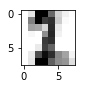

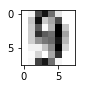

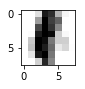

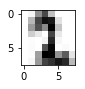

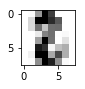

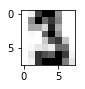

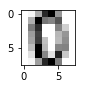

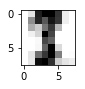

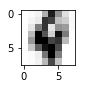

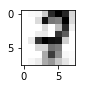

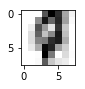

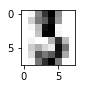

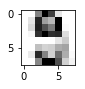

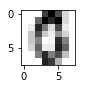

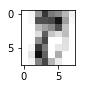

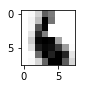

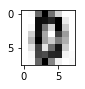

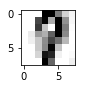

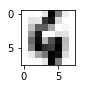

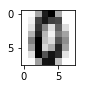

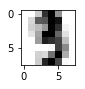

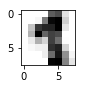

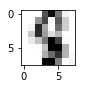

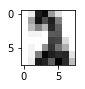

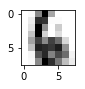

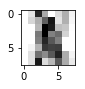

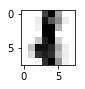

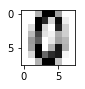

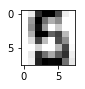

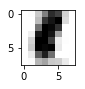

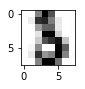

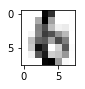

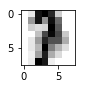

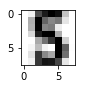

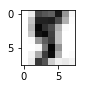

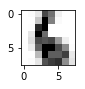

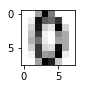

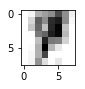

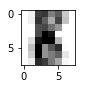

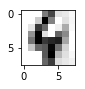

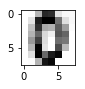

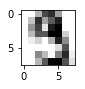

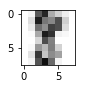

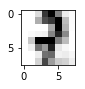

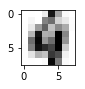

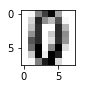

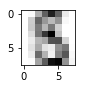

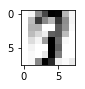

In [11]:
plot_figures(kde_Z_1_new)

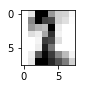

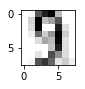

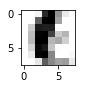

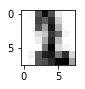

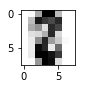

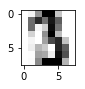

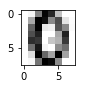

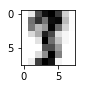

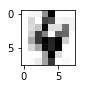

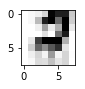

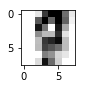

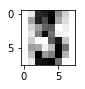

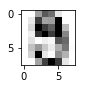

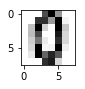

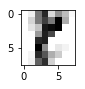

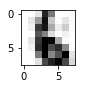

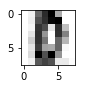

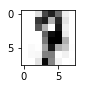

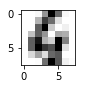

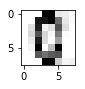

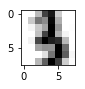

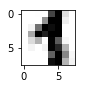

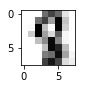

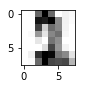

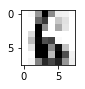

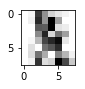

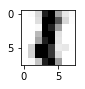

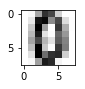

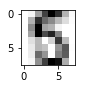

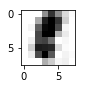

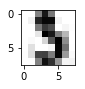

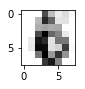

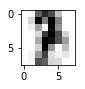

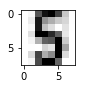

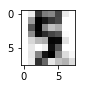

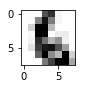

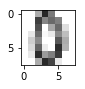

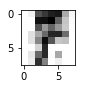

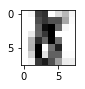

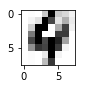

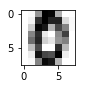

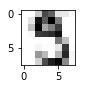

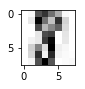

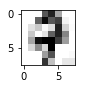

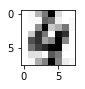

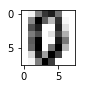

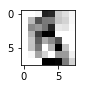

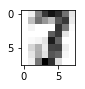

In [12]:
plot_figures(kde_Z_2_new)

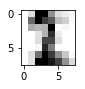

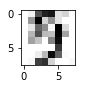

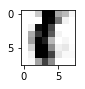

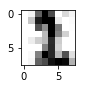

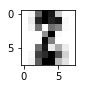

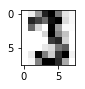

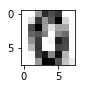

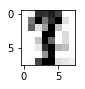

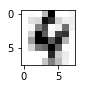

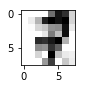

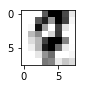

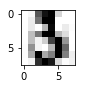

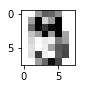

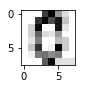

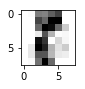

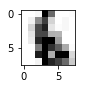

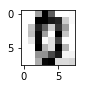

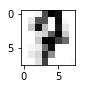

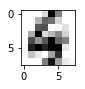

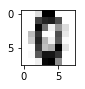

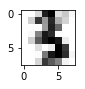

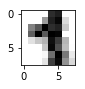

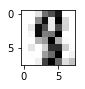

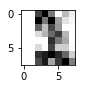

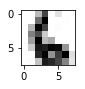

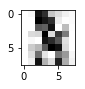

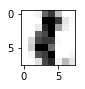

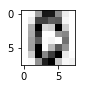

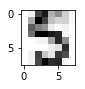

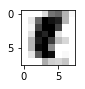

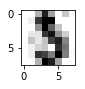

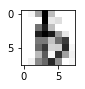

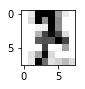

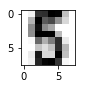

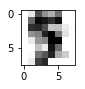

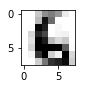

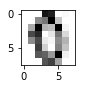

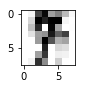

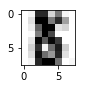

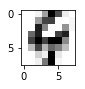

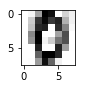

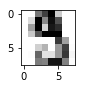

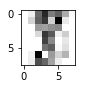

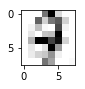

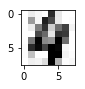

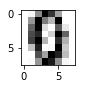

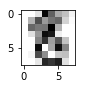

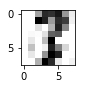

In [13]:
plot_figures(kde_Z_3_new)

In [14]:
def get_no_of_comp(data):
    n_components = np.arange(1, 35)
    models = [GMM(n, covariance_type='full', random_state=0).fit(data) for n in n_components]

    val = [m.bic(data) for m in models]
    plt.plot(n_components, val)
    n_comp = val.index(min(val))
    return n_comp+1

10


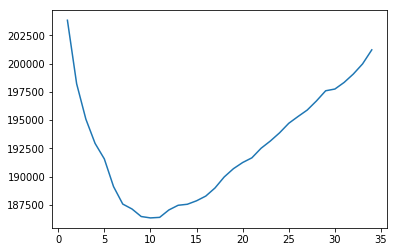

In [15]:
no_of_comp_Z_1 = get_no_of_comp(Z_1)
print no_of_comp_Z_1

8


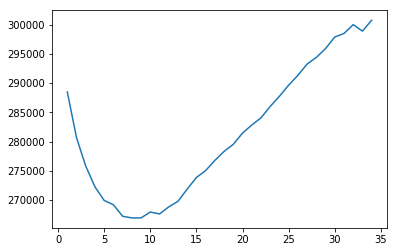

In [16]:
no_of_comp_Z_2 = get_no_of_comp(Z_2)
print no_of_comp_Z_2

7


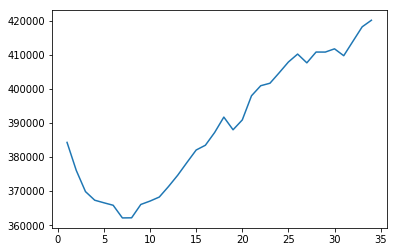

In [17]:
no_of_comp_Z_3 = get_no_of_comp(Z_3)
print no_of_comp_Z_3

In [18]:
def fitGMM(data, no_of_comp):
    gmm = GMM(no_of_comp, covariance_type='full', random_state=0)
    gmm.fit(data)
    print(gmm.converged_)
    return gmm

In [19]:
gmm1 = fitGMM(Z_1,no_of_comp_Z_1)

True


In [20]:
gmm2 = fitGMM(Z_2,no_of_comp_Z_2)

True


In [21]:
gmm3 = fitGMM(Z_3,no_of_comp_Z_3)

True


In [22]:
def get_data_from_gmm(gmm,pca):
    data_new = gmm.sample(48)
    # print data_new
    print data_new[0].shape
    digits_new = pca.inverse_transform(data_new[0])
    print digits_new.shape
    # plot_digits(digits_new)
    return digits_new

In [23]:
gmm_Z_1_new = get_data_from_gmm(gmm1,pca1)

(48, 17)
(48, 64)


In [24]:
gmm_Z_2_new = get_data_from_gmm(gmm2,pca2)

(48, 26)
(48, 64)


In [25]:
gmm_Z_3_new = get_data_from_gmm(gmm3,pca3)

(48, 38)
(48, 64)


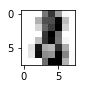

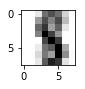

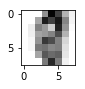

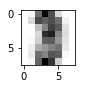

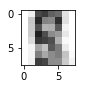

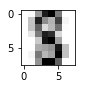

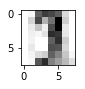

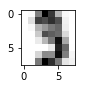

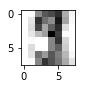

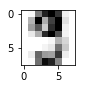

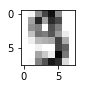

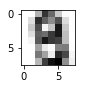

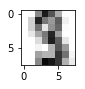

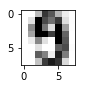

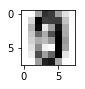

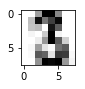

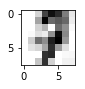

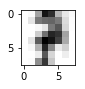

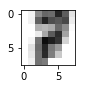

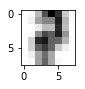

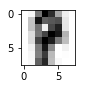

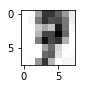

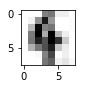

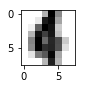

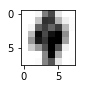

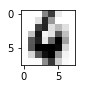

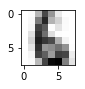

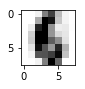

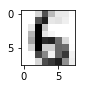

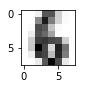

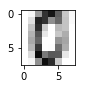

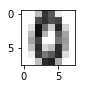

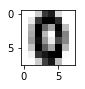

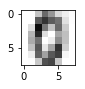

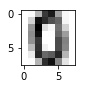

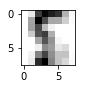

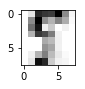

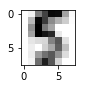

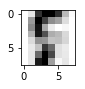

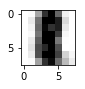

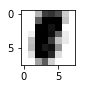

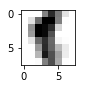

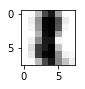

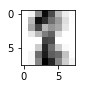

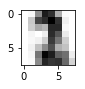

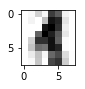

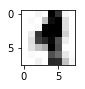

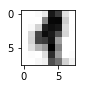

In [26]:
plot_figures(gmm_Z_1_new)

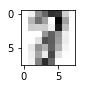

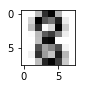

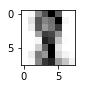

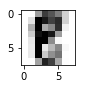

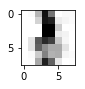

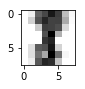

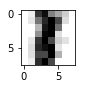

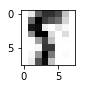

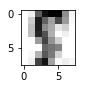

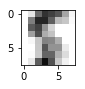

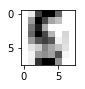

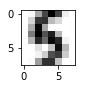

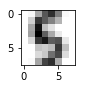

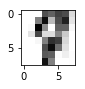

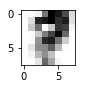

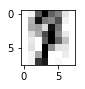

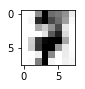

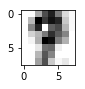

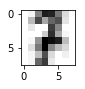

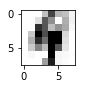

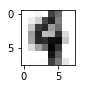

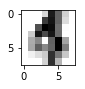

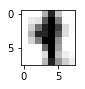

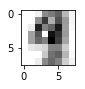

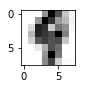

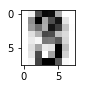

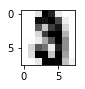

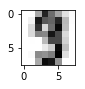

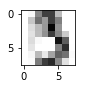

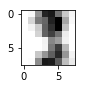

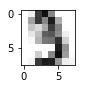

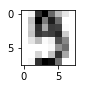

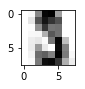

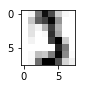

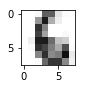

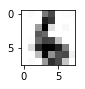

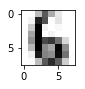

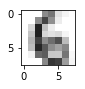

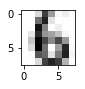

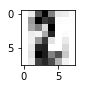

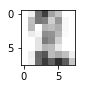

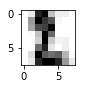

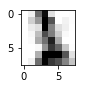

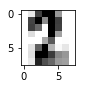

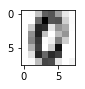

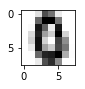

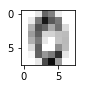

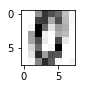

In [27]:
plot_figures(gmm_Z_2_new)

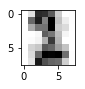

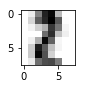

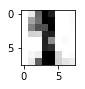

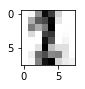

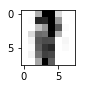

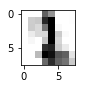

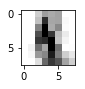

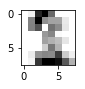

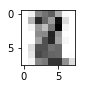

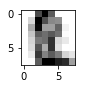

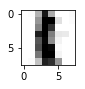

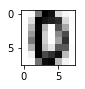

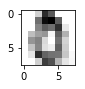

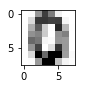

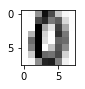

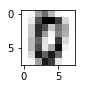

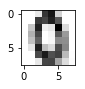

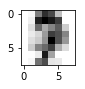

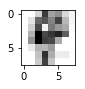

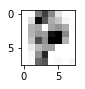

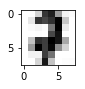

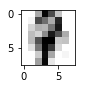

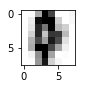

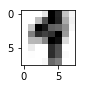

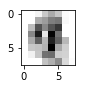

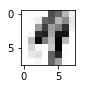

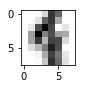

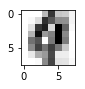

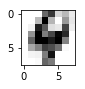

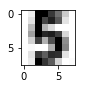

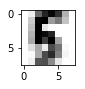

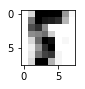

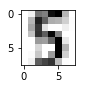

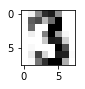

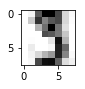

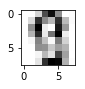

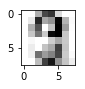

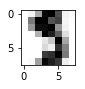

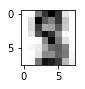

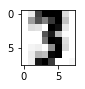

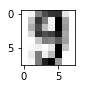

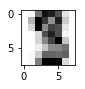

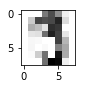

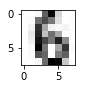

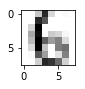

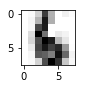

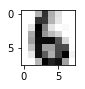

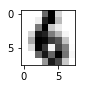

In [28]:
plot_figures(gmm_Z_3_new)